In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [8]:
### Loading in data
# Credit-card kaggle
cc_df = pd.read_csv("creditcard.csv")

# X: features
x_cc = cc_df.iloc[:,1:30]
x_cc = np.array(x_cc)

# Y: labels
y_cc = cc_df['Class'].values

# Original
x_train, x_test, y_train, y_test = train_test_split(
    x_cc,
    y_cc,
    random_state=42)

Odds vs Probability
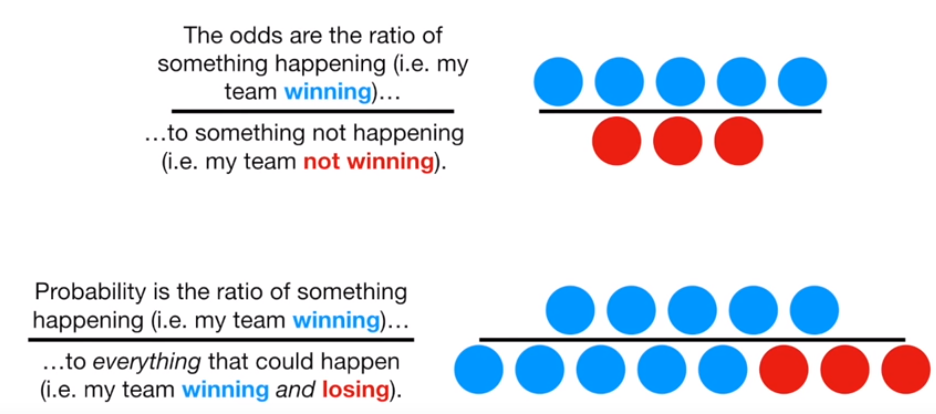

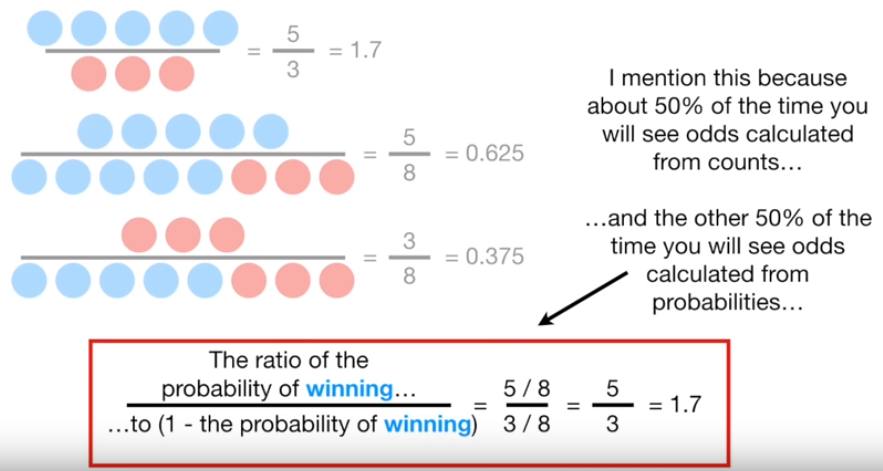

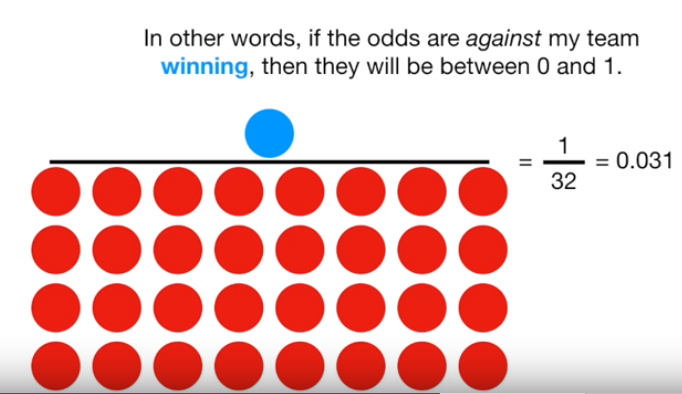

Magnitude of odds against my team is so much smaller then odds for my team
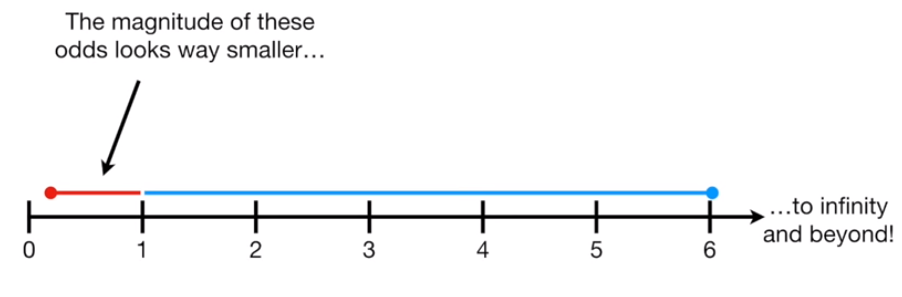

Taking log makes this scale symmetrical
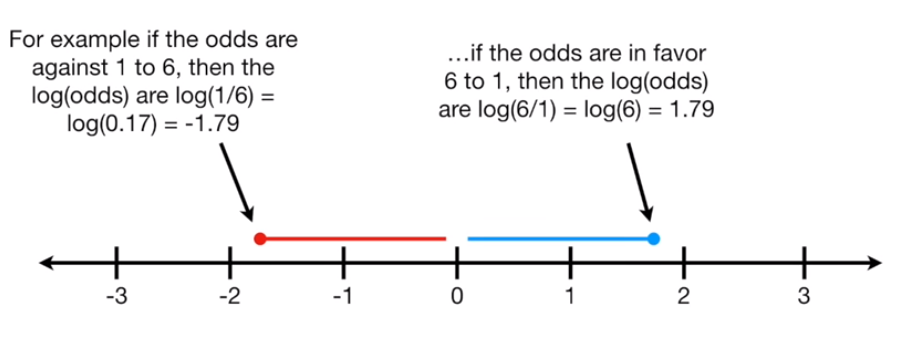

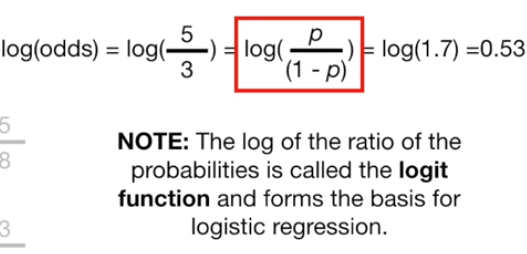

Because if we random pick numbers from 1-100 and plot the log(number) on a histogram, we get a normal distribution. Very useful for determining binary classification situations

Odds Ratio: ratio of odds
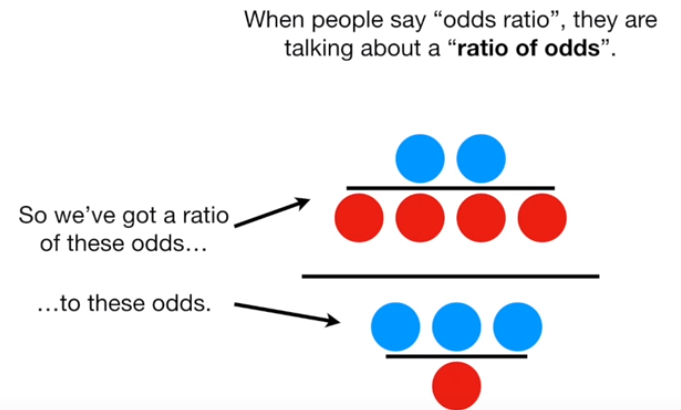

Odds ratio example
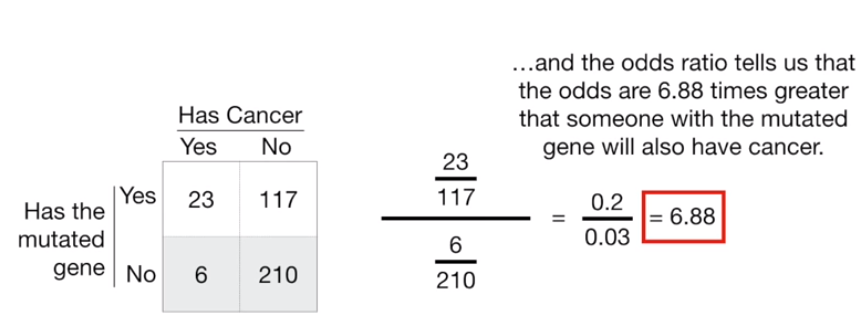

Like R-squared, odds ratio/log(odds ratio) indicates a relationship between 2 things.
Larger value = feature is good predictor

But just like R-square, we need to know if this odds ratio is statistically significant

Test statistical significance
Fisher
Chi-square test:
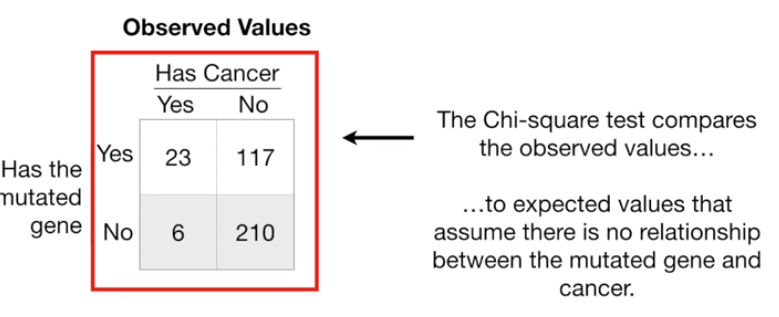

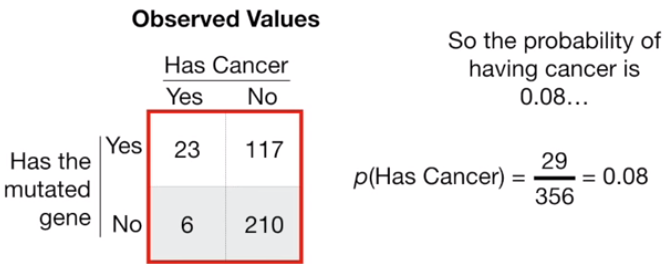

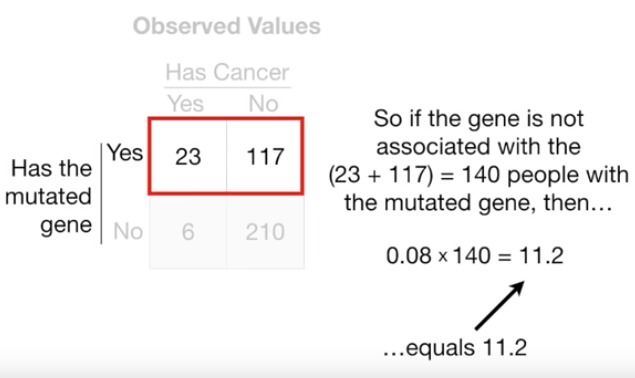
Which is the expected value of people who has mutated gene and has cancer

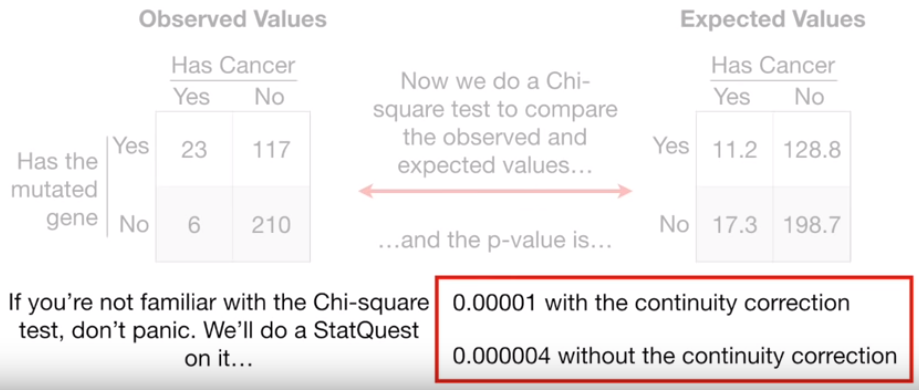

The Wald's test:  
Commonly used to determine significance of odds-ratios in logistic 
regression and to calculate confidence intervals
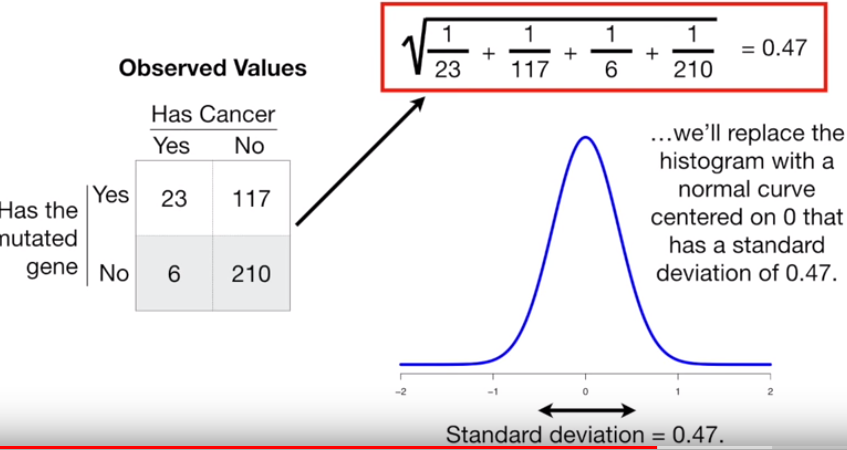

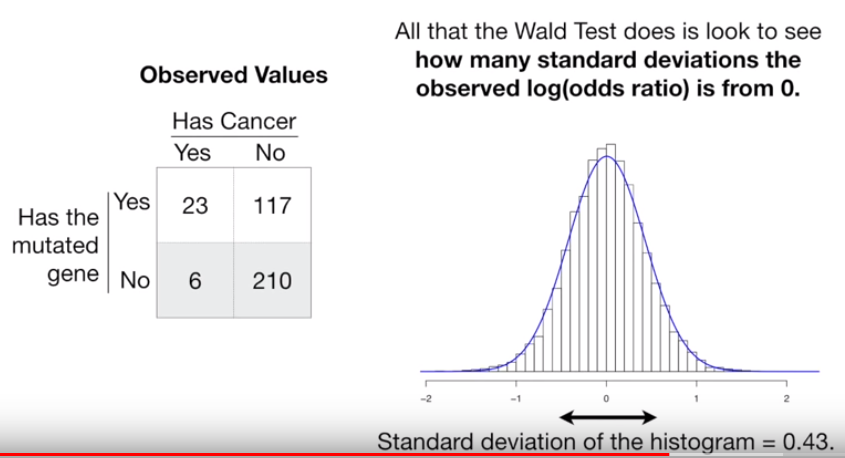

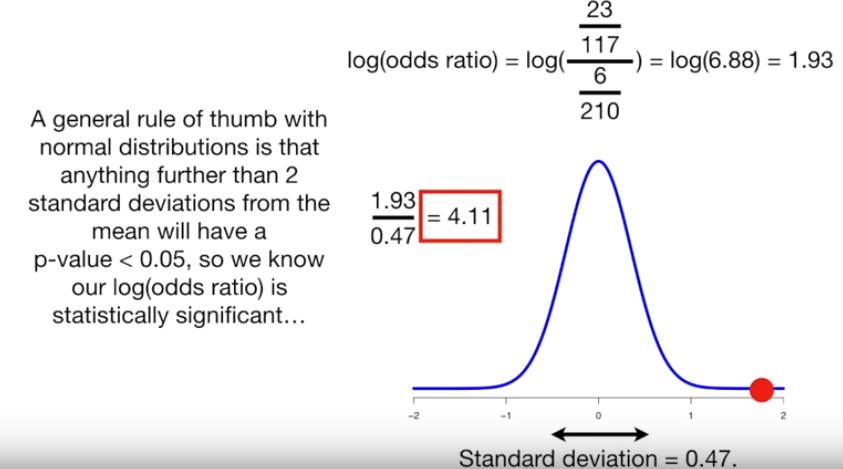

The p-value is the area under the curve of > 1.93 and < -1.93. Basically, the tails

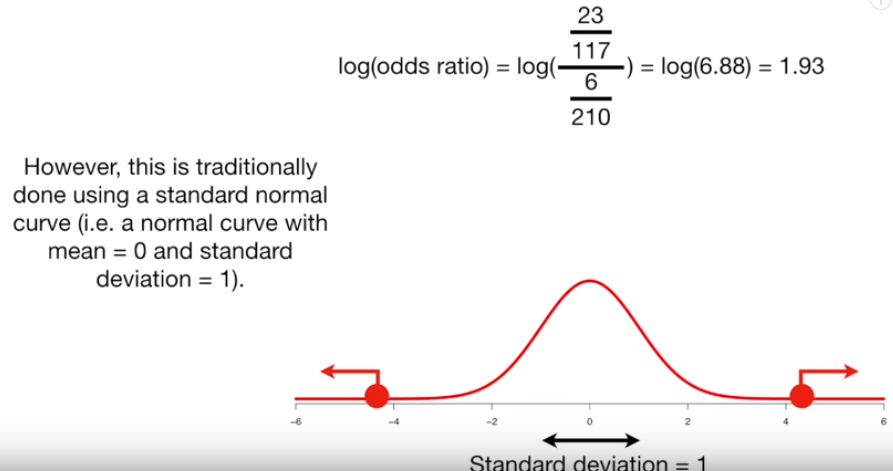

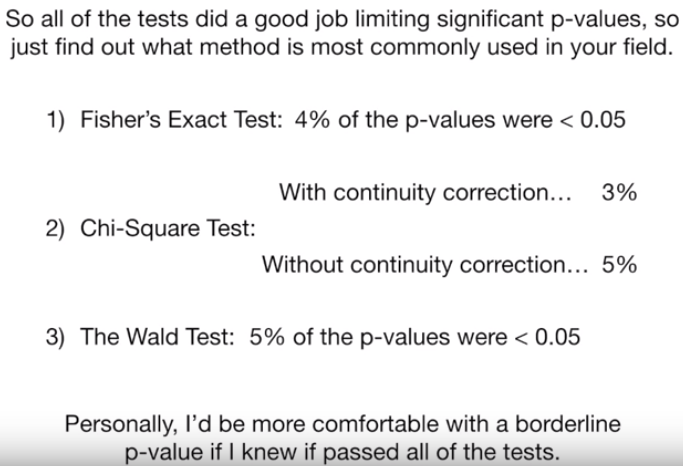

### Decision Tree
Decision tree regressor: https://www.saedsayad.com/decision_tree_reg.htm  
Decision tree classifier: https://www.saedsayad.com/decision_tree.htm  

https://medium.com/@pushkarmandot/how-exactly-xgboost-works-a320d9b8aeef

### Random Forest:  

1. Random sampling of training data points when building trees   
(e.g. randomly select with replacement, no. of data points selected same as original [bootstrapping])
    - The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest will have lower variance but not at the cost of increasing the bias. At test time, predictions are made by averaging the predictions of each decision tree [aggregating]. (Also known as **bagging**) 
    - Each tree's vote has the same say as another tree's
    - Each tree is made independently of others, order of construction doesnt matter
    - Typically 1/3 of original data does not make it to the bootstrapped dataset, they are the **Out-of-Bag** data points
    - Use **Out-of-bag Error** to choose the parameters (e.g. no. variables to sample) in Random Forest model.
    
2. Random subsets of features considered when splitting nodes (e.g. randomly selects 4 out of 10 features and use gini to split)

3. Dealing with missing data:  

    (1) Missing data in original dataset used to create RF  
    - Fill in missing with most common value
    - Refine guess by identifying samples that are similar to the one with missing data by _building a RF, run data through all RF, record similar samples (end in same leaf node) in proximity matrix, divide values in proximity by total number of trees, use normalized proximity values as weights to calculate weighted average to fill in missing data, iterate process 6-7 times until missing values converge (no longer change each time we recalculate) _
 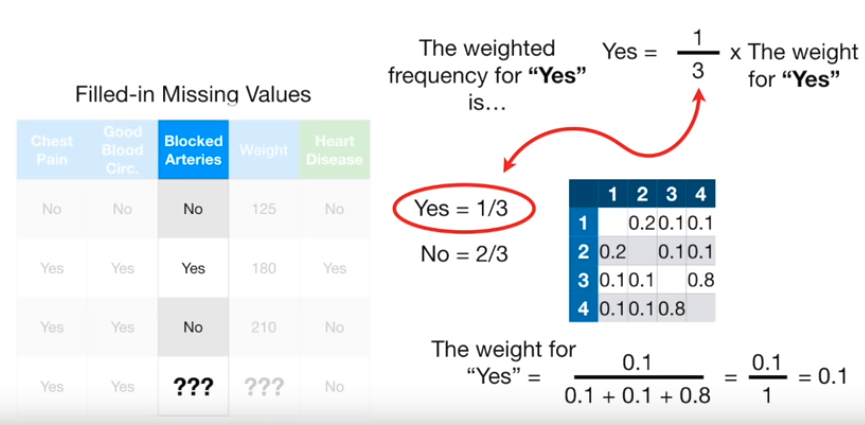

(2) Missing data in new sample that you want to categorize
   - Already have RF built and want to classify new data  
   - Create n number of samples, where n is number of class
   - Use iterative method above to predict missing data in variables (e.g. Blocked arteries)
   - Sample which is correctly labeled by RF the most times is the winner 
   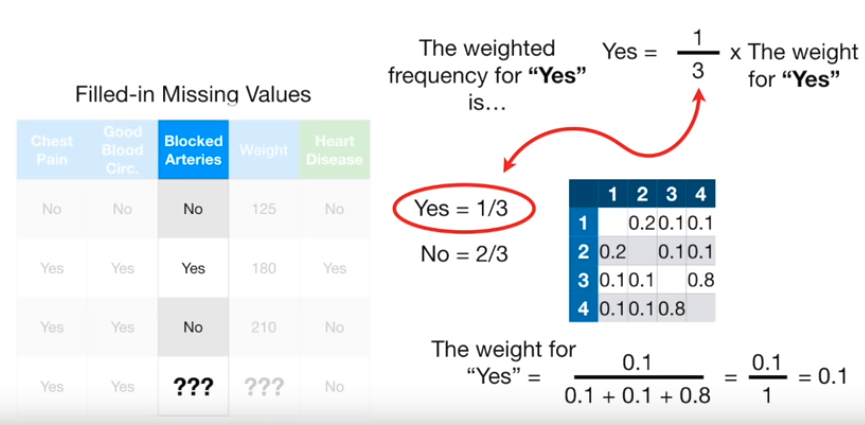
      

In [ ]:
Pure Decision Tree not flexible when it comes to classifying new samples


### Boosting algorithms

Used for reducing bias and variance in supervised learning by combining multiple weak predictors to build a strong predictor.

### AdaBoost

_Uses weight scale to distinguish classified and misclassified data points. High weight = misclassfied_

Stump: Tree with 1 node and 2 leaves, weak learners as they can only use 1 variable to make decisions, where a full-sized Decision Tree would use all n variables to make a decision

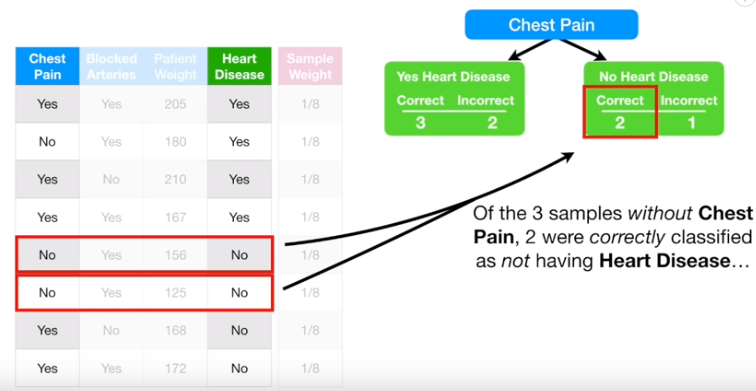

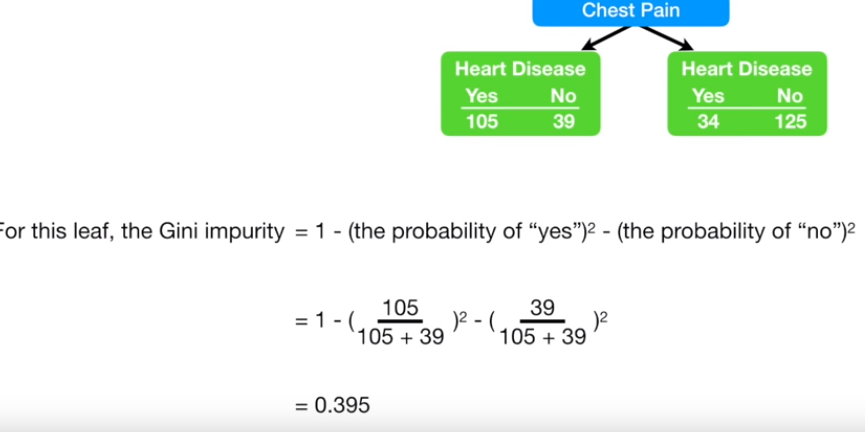

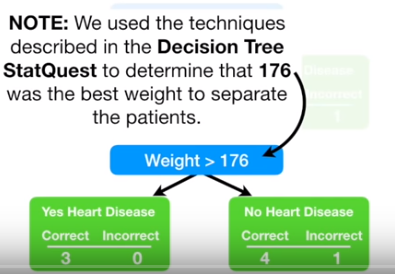

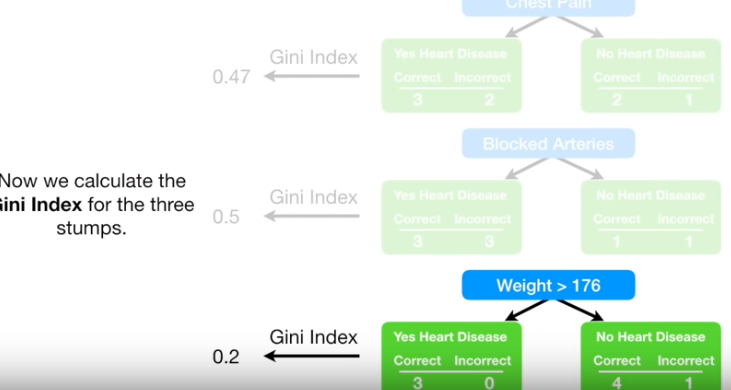

Lowest Gini index would be the 1st stump in the forest of stumps.

Determine amount of say in final classification based on how accurate the stump is:
Total Error for a stump = sum(weights associated w incorrectly classified samples)

This stump made 1 error so total error: 1* 1/8 = 1/8
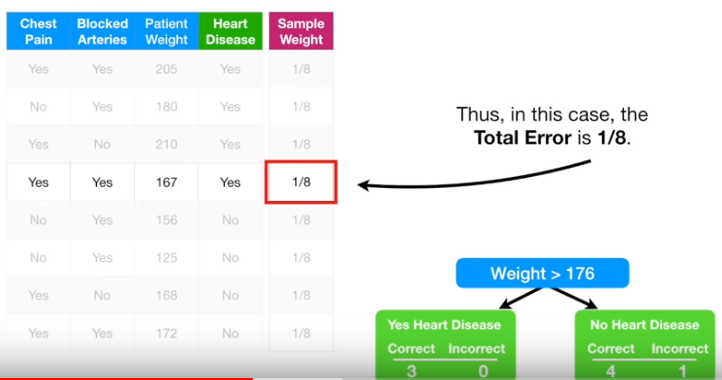

For regressors, total error: (y_true - y_predict)[called pseudo residuals] * sample weight

_0 < Total Error < 1 because sum(Sample Weight) = 1_
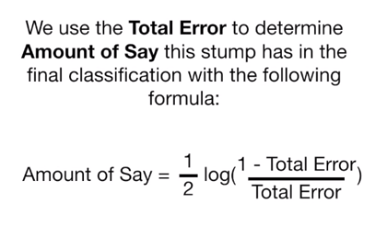

When stump is only 50% accurate, it has 0 say.   
Plot amount of say (y) vs total error (x) gives a -x^3 graph
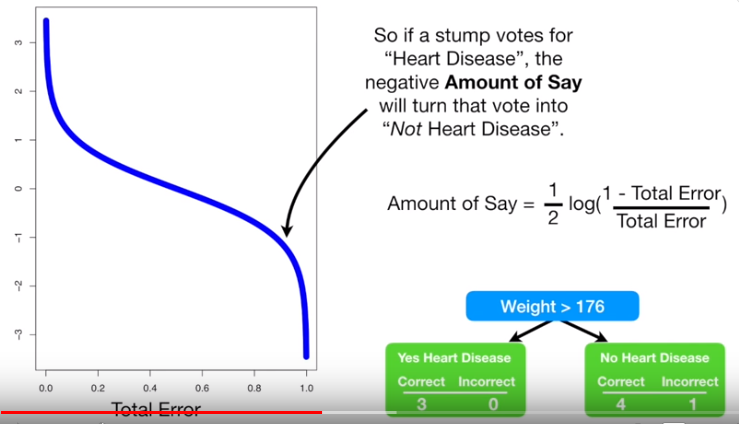

In practice, a small error term is added as Total Error =0 or 1 will freak the equation out

How to modify the weights so next stump will take errors made by previous stump into account

For incorrectly classified samples:
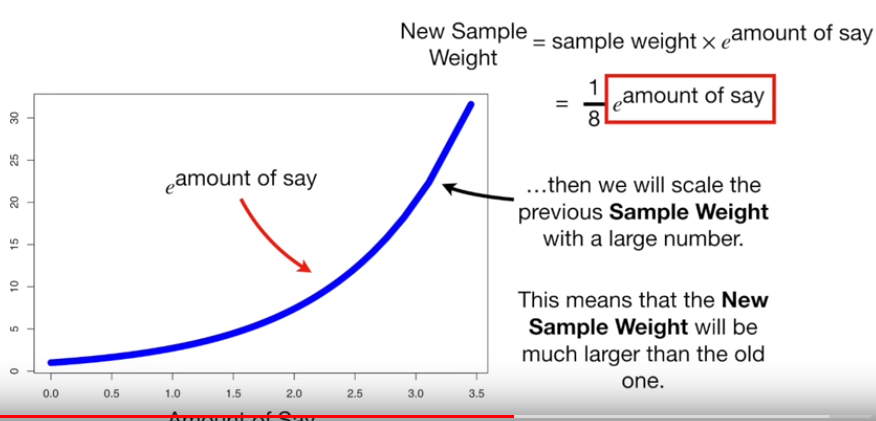

For correctly classified samples:  
New sample weight = sample weight * $e^{-amount of say}$

We could also use the sample weights to calculate weighted gini index and use it in the next tree
or we could make a new collection of samples that contains duplicate copies of samples with largest sample weights, query via random  

Larger stumps get more say in the final classification than smaller

Order of trees made matters: errors made in 1st stump influences how 2nd stump is made

Compare the amount of say for forest of stumps that predict 1 vs that for FOS that predicts 0. FOS with largest amount of say wins

Step 1: Train a decision tree with each observation has equal weights

Step 2: Evaluate the first tree, increase the weights of those that were misclassified, decrease those that were correct

Step 3: Second tree is trained(grown) on newly weighted data

Step 4: Compute classification error from 2-tree ensemble model (Tree1 + Tree2) and grow third tree to predict.

Step 5: Iterate

_Subsequent trees help to classify observations that are not well classified by previous trees_

**Final model: weighted sum of predictions made by previous tree models**

### Gradient Boosting

_Uses loss function to measure the degree of misclassification/classification_

Builds a terminal leaf first instead of stump, and grow tree using this prediction  
Fixed sized trees are build each iteration, like Adaboost but each tree usually larger than a stump, scales all trees by same amount unlike Adaboost. Scaling = sample weights for adaboost, learning rate for gradient boost

Step 1 : Assume mean is the prediction of all variables (terminal leaf), e.g. 72.

Example of why it is mean:  
Default loss function: least squares
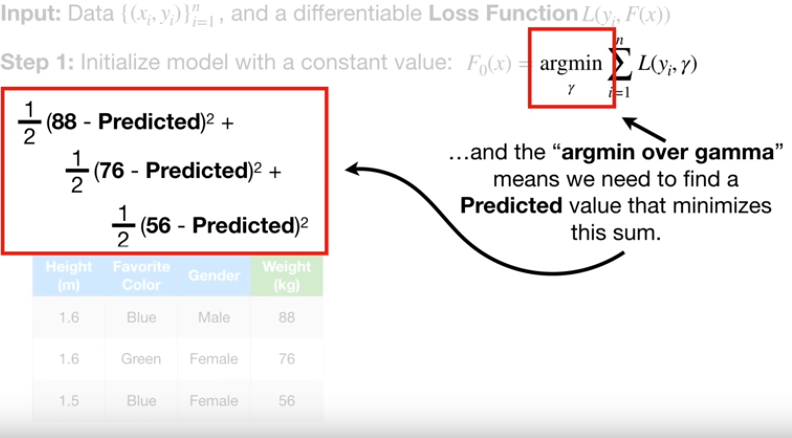

Take derivate to minimize this sum and set it to zero
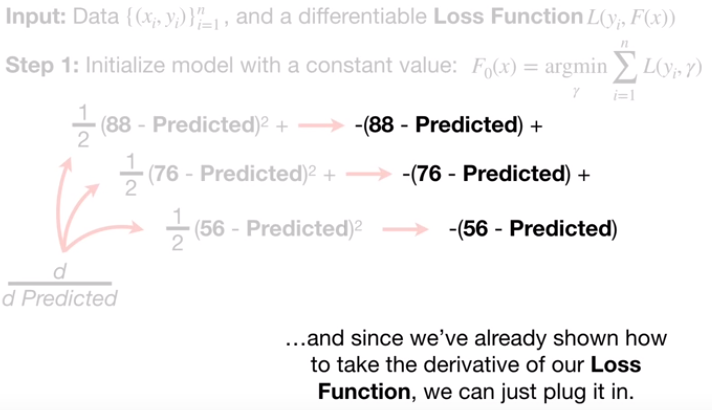

And we ended up with the mean!
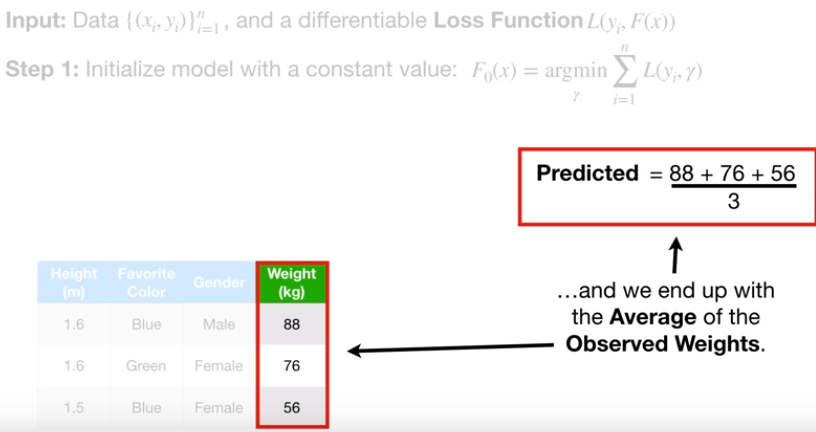

Step 2 : Calculate errors of each observation from the mean to get the Pseudo Residuals.

Math: the gradient is the residual (Pseudo), depending on loss function
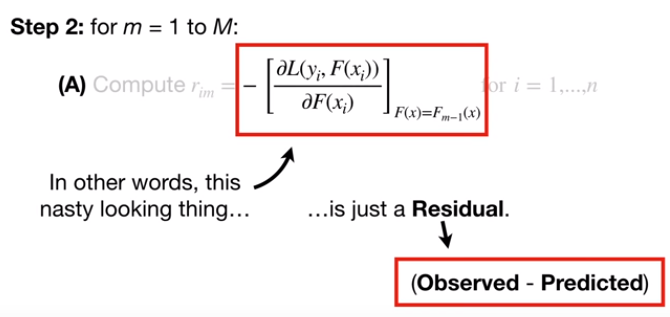

Step 3 : Build 2nd tree to predict the Pseudo Residuals

Step 4 : Find the variable that can split the errors perfectly and find the value for the split. This is assumed to be the latest prediction.

By restricting the number of leaves, we get more residuals then leaves so we replace the residuals with their average
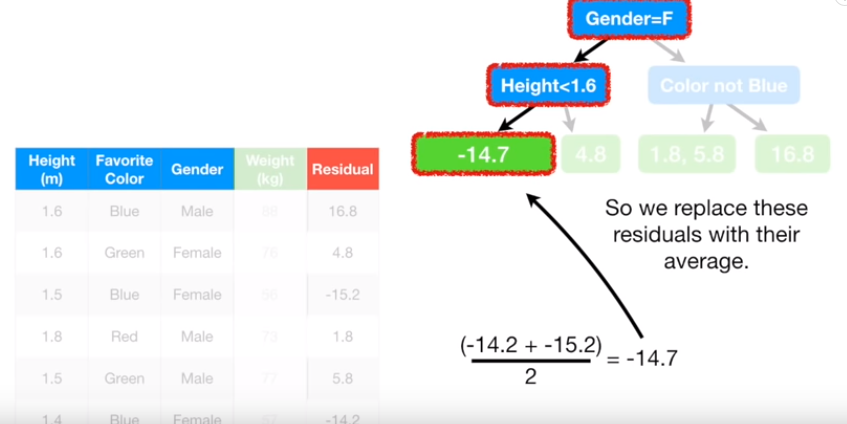

Math 
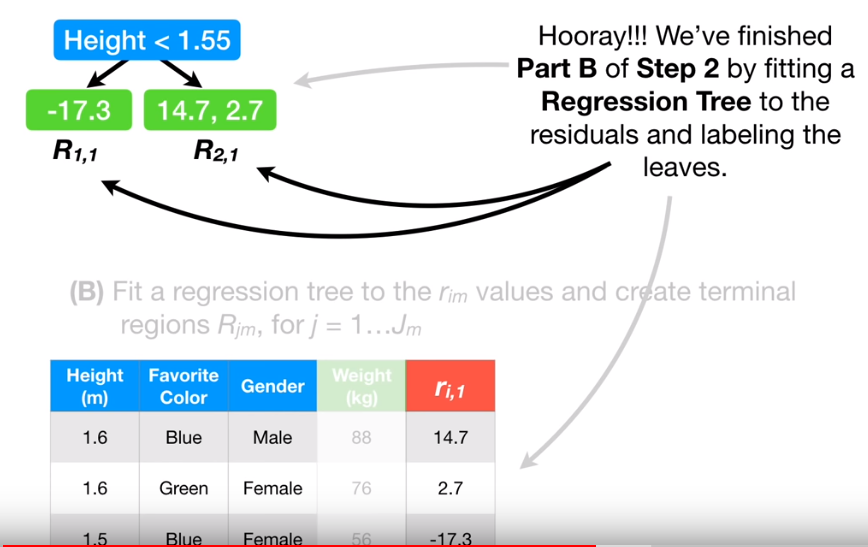

Making prediction from training data:

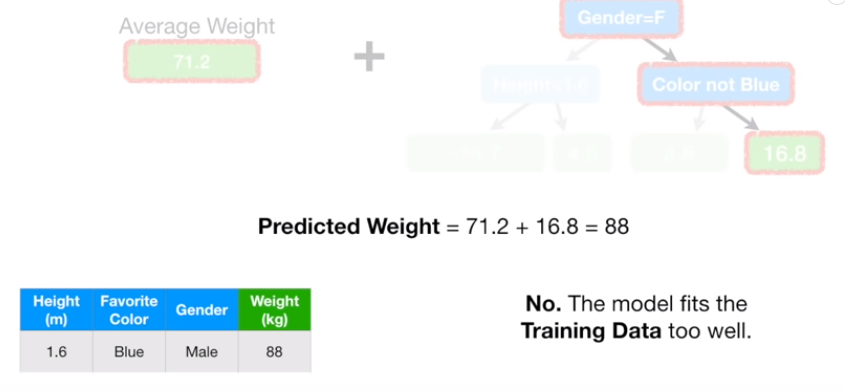
**Prediction == True => Overfitting**

Math
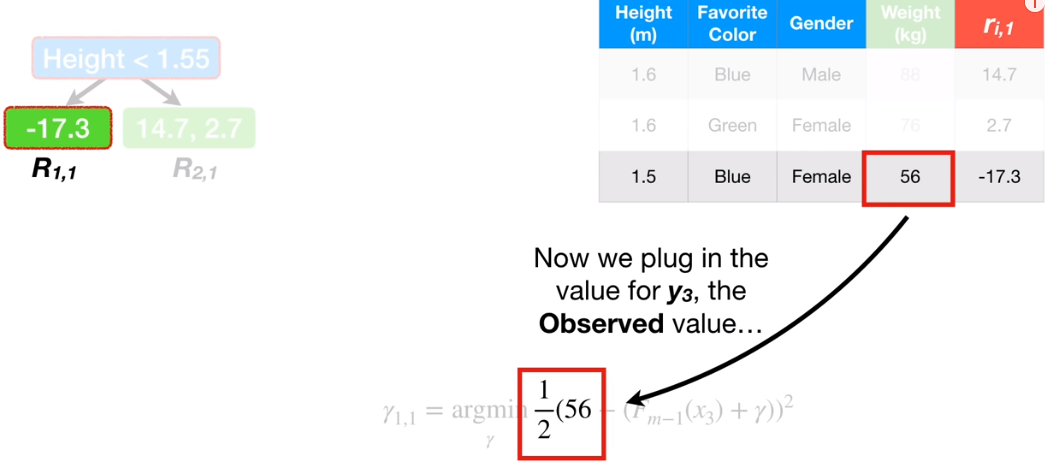

Math  
For first tree
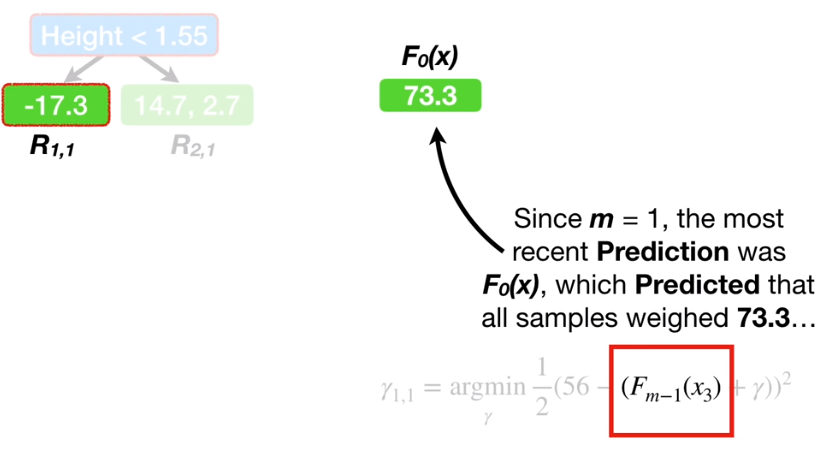

Than we have to minimize this equation by differentiating it and assigning it to 0

Math   
For second tree
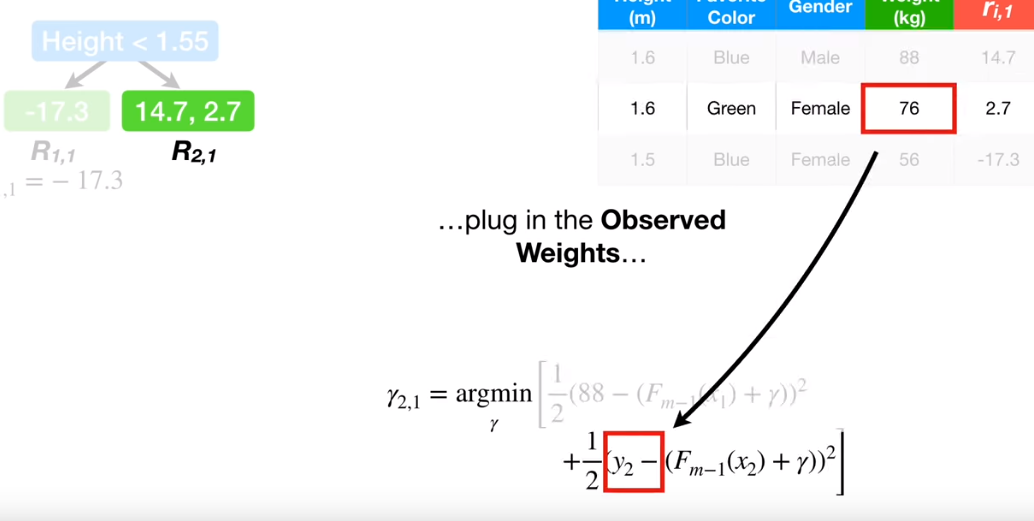

Math Part C of step 2
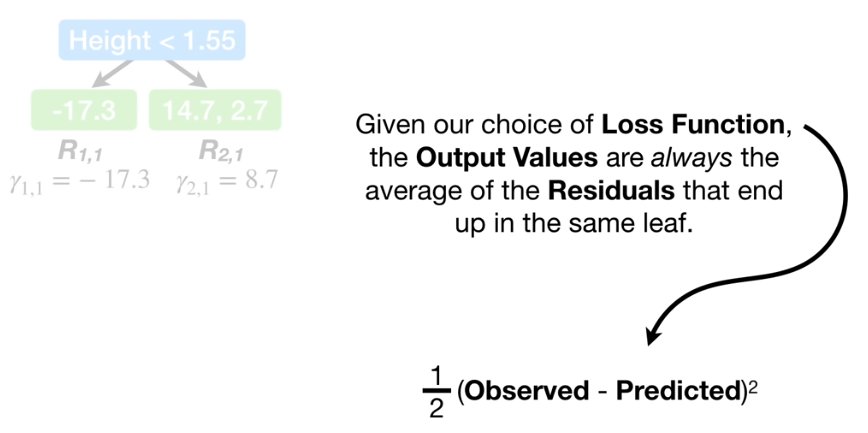

Low Bias but very high variance hence learning rate is added
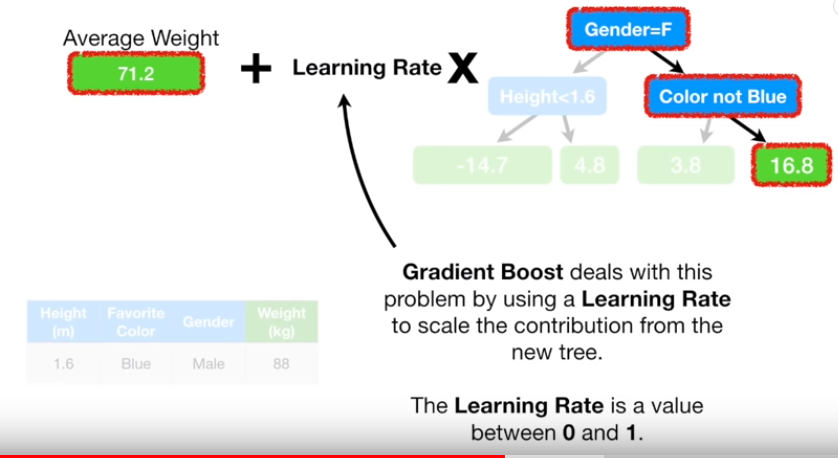

According to inventor of Gradient Boost, empirical evidence shows that taking a lot of small steps in the right directin results in better Predictions with a Testing Dataset e.g. lower variance

Math
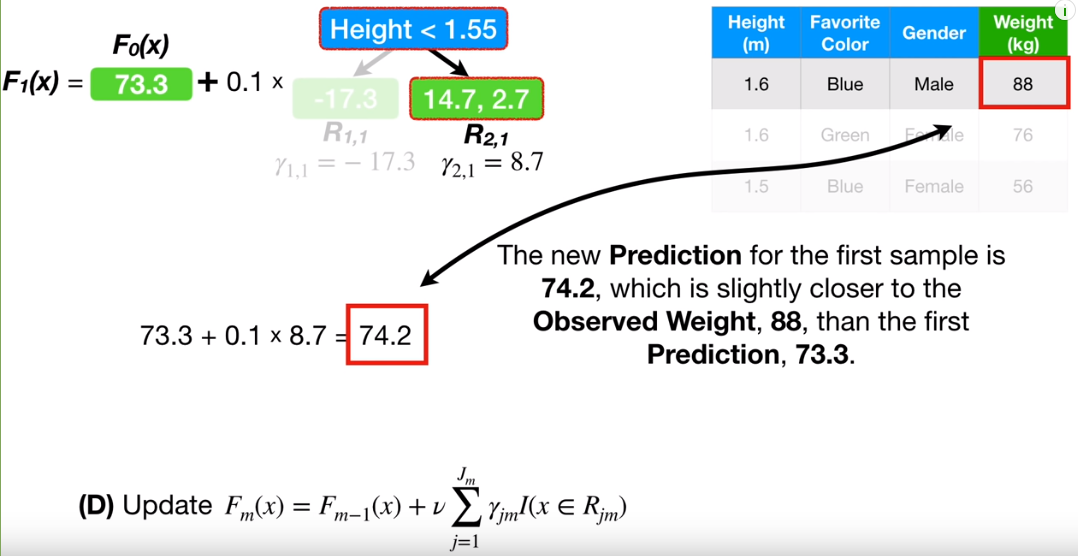

Math: If total number of trees = 2,
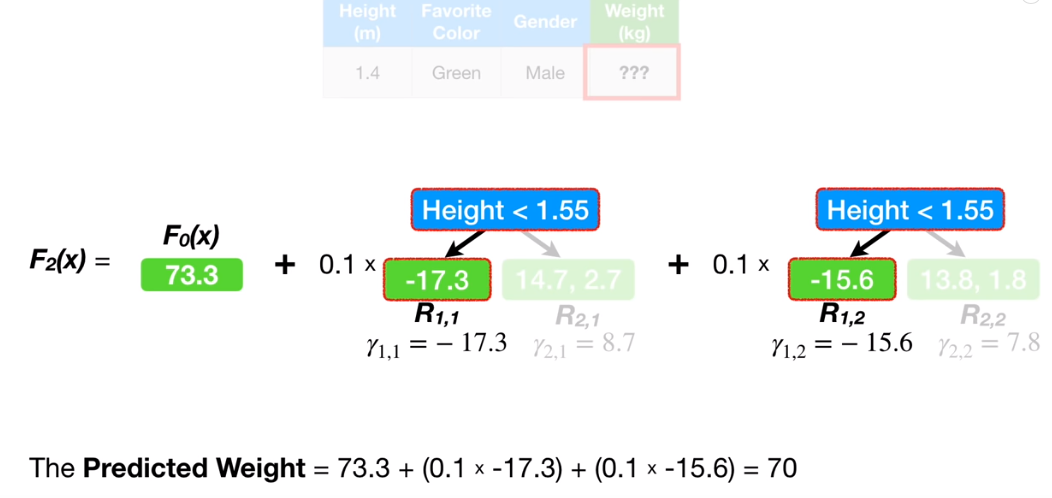

**Iterative process**
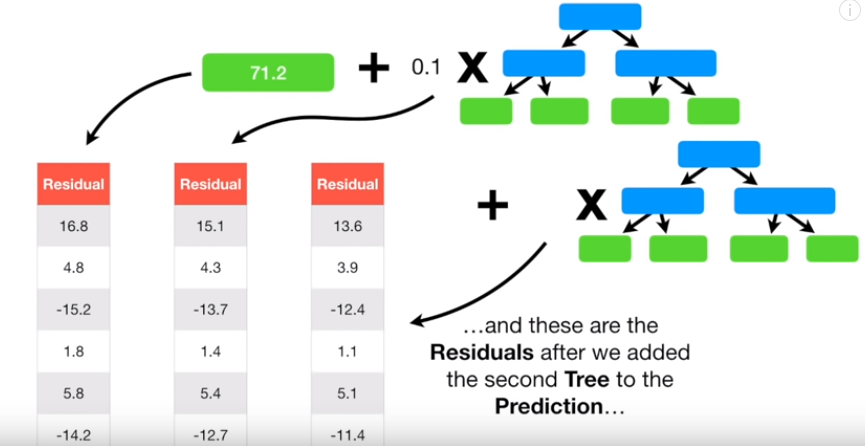

Residual 1 = true - initial prediction (which is avg weight)

Residual 2 = true - (initial prediction + learning rate * predict tree 1)

Residual 3 = true - (initial prediction + learning rate * predict tree 1 + learning rate * predict tree 2) 

...
until max tree specified or adding trees does not significantly reduce size of residuals

Use the resulting tree to predict new samples

Math
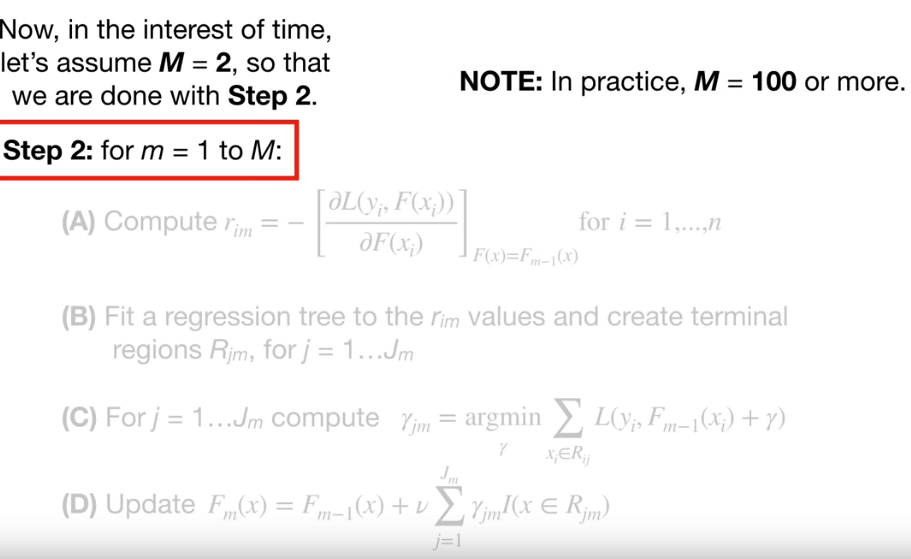

Step 5 : Calculate errors of each observation from the mean of both the sides of split (latest prediction).

Step 6 : Repeat the step 3 and 4 till the objective function maximizes/minimizes.

Step 7 : Take a weighted mean of all the classifiers to come up with the final model.

Regression: loss function would be based off the error between true & predicted value
Classification: loss function would be a measure of how good the model is at classifying

### Gradient Boosting for Classification

- A lot in common with Logistic Regression

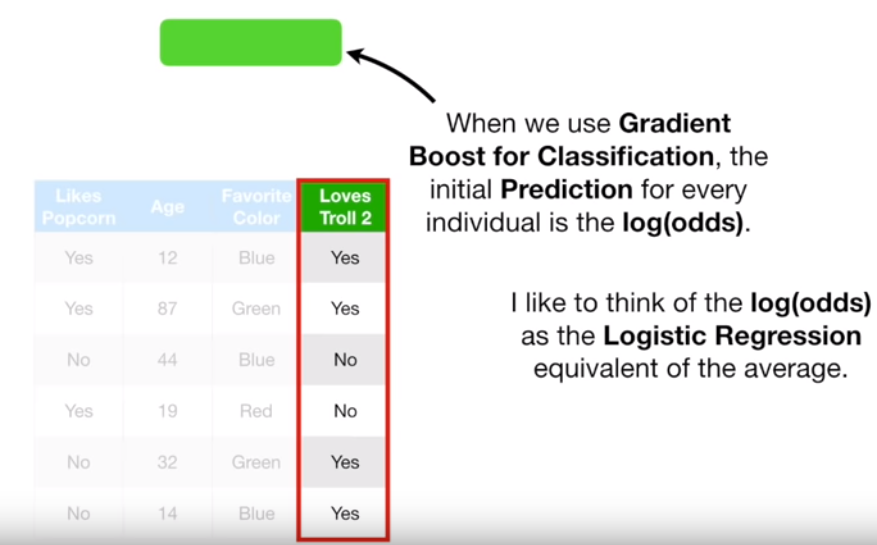

Since 2 ppl says No and 4 ppl say Yes, the log(odds) that someone Loves Troll 2 = log(4/2) = 0.6931 = initial prediction.

Prob of Loving Troll 2 = 0.6667
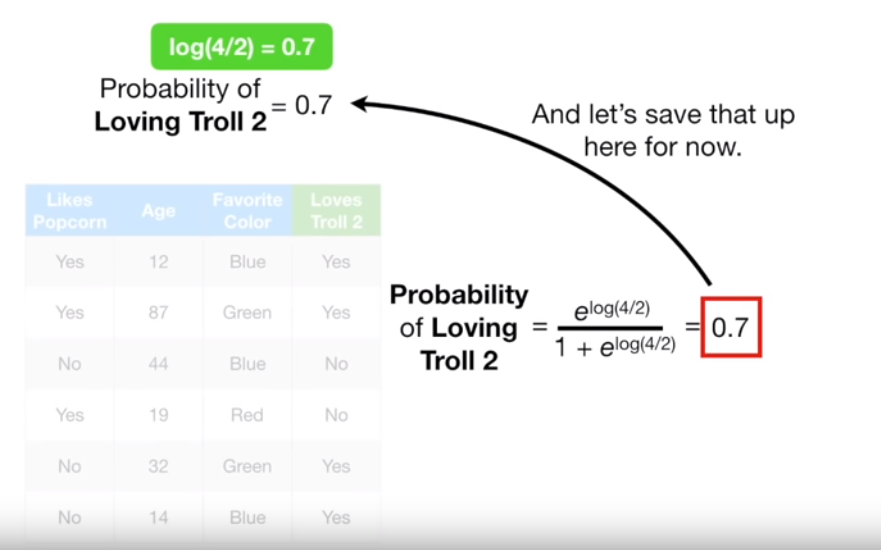

Since the Probability of Loving Troll 2 > 0.5 (common threshold, ROC & AUC to determine threshold), we can classify that everyone in the training dataset Loves Troll 2

Note on threshold: Lower threshold if it is more impt if False Positives are less dangerous than False Negatives, meaning classifying someone to have ebola is more important than classifying someone to not have ebola. Use ROC curve to find the optimal threshold, assumption is that recall is not a big issue. Higher AUC is better. 

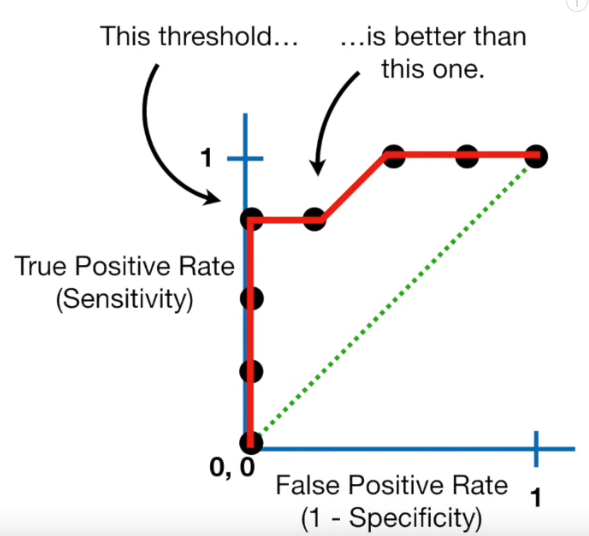

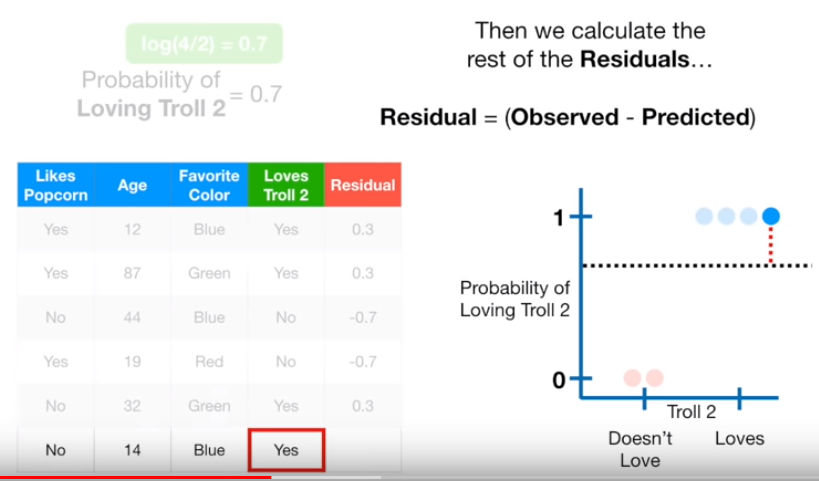

GBR: Output value = residual 
GBC: Cant do that because prediction is derived from log(odds) and the leaf is derived froma probability. Hence, the transformation below is required
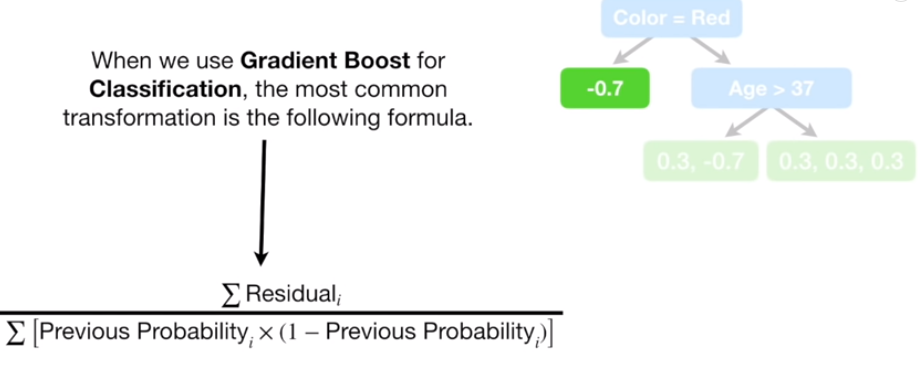

Example
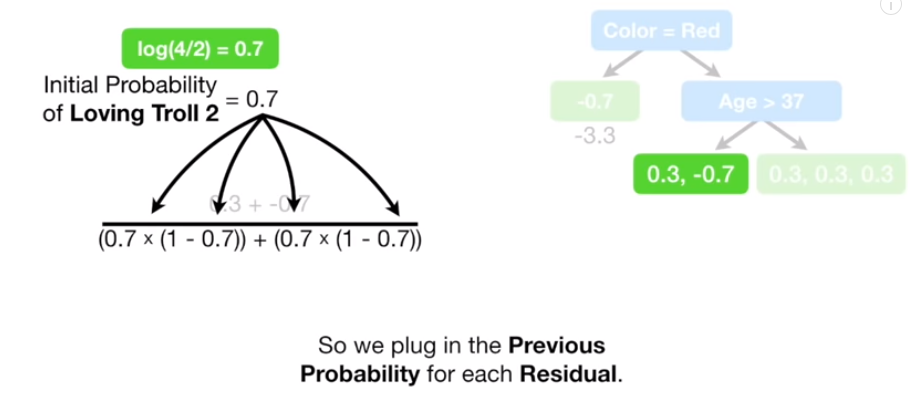

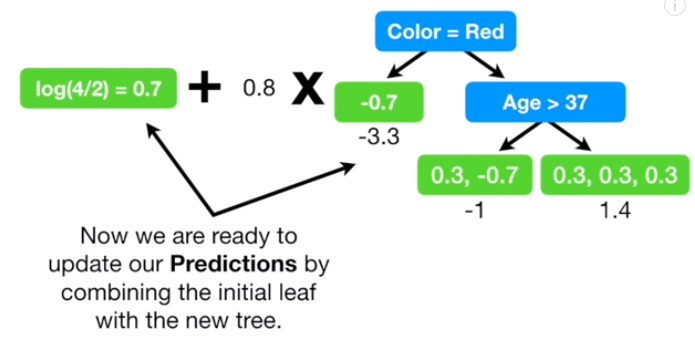

Now we calculate the new log(odds) Prediction for the data
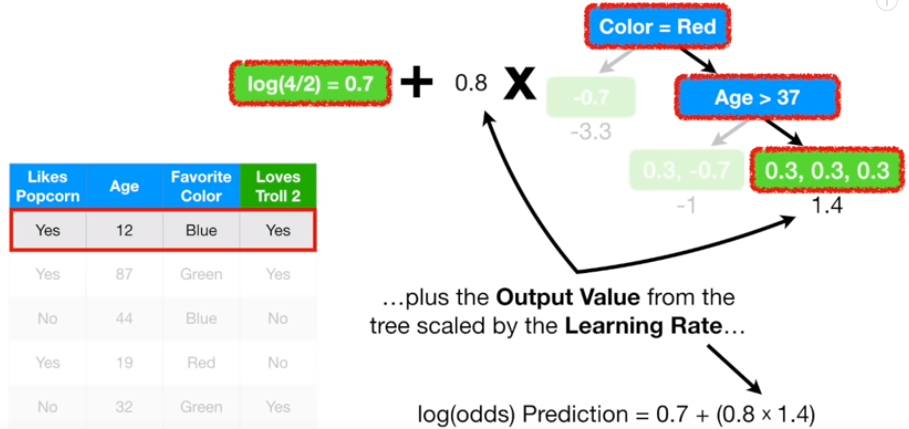

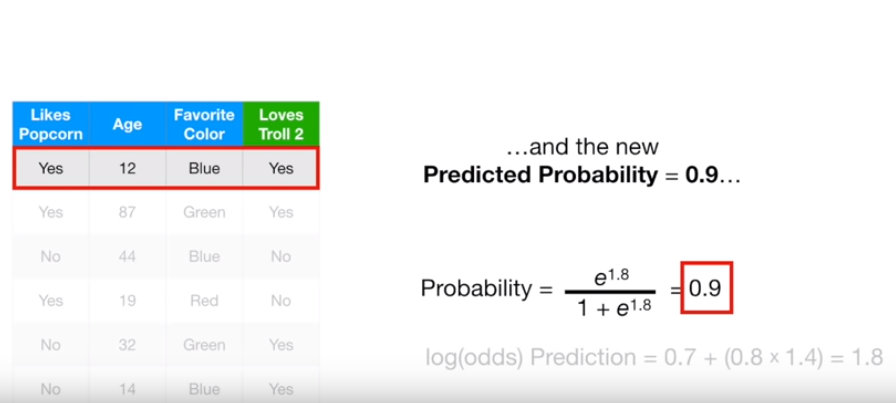

Iterate this process till max number of trees built or minimum residual hit

#### Gradient Tree Boosting

Pros:
- Handles data of mixed type (e.g. continuous, discrete, category)
- Robust to  outliers via robust loss functions

Cons:
- Scalability due to sequential nature of boosting that can't be parallelized

`GradientBoostingClassifier`: uses decision stumps (decision trees)
`GradientBoostingRegressor`: supports a number of loss functions (default: least squares)

#### GradientBoostingRegressor


In [12]:
# Fit Regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# In case we need feel that the model is underfitting and wants to add more estimators
_ = clf.set_params(n_estimators=200, warm_start=True)
_.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

In [ ]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# Out-of-bag estimates

### Pros:
- Allows one to optimize a user-specified cost function